# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
websites.head()


URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1              None               None  ...                     7           4   
2              None               None  ...                     0           0   
3    7/10/1997 4:00    12/09/2013 0:45  ...                    22           3   
4   12/05/1996 0:00    11/04/2017 0:00  ...                     2           5   

   APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
0        700                   9                  10              1153   
1       1230                  17                  19              1265   
2          0                   0                   0                 0   
3       3812                  39                  37             18784   
4       4278                  61                  62            129889   

   REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0               832            9              2.0     1  
1              1230           17              0.0     0  
2                 0            0              0.0     0  
3              4380           39              8.0     0  
4              4586           61              4.0     0  

[5 rows x 21 columns]

In [4]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [5]:
websites.shape

(1781, 21)

In [6]:
# percent of null values in Content_Length
812/1781

0.45592363840539024

In [7]:
#column data types
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [8]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

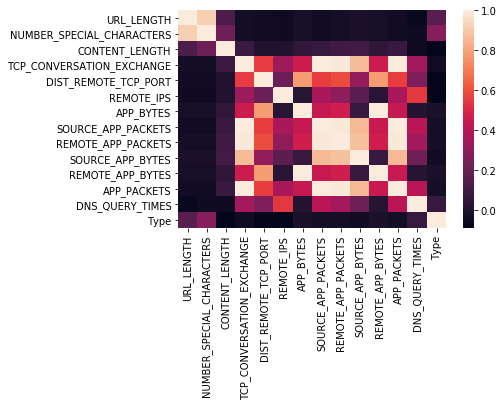

In [9]:
# Your code here
import seaborn as sns
websites.corr()
sns.heatmap(websites.corr())

In [10]:
# Your comment here

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

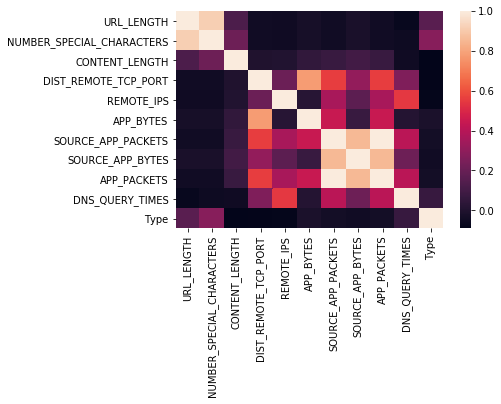

In [11]:
# Your code here
websites1 = websites.drop('REMOTE_APP_BYTES', axis = 1)
websites1.head() 
websites2 = websites1.drop('REMOTE_APP_PACKETS',axis = 1)
websites2
websites3 = websites2.drop('TCP_CONVERSATION_EXCHANGE',axis = 1)
sns.heatmap(websites3.corr())
websites4 = websites3.drop('SOURCE_APP_PACKETS',axis = 1)


In [12]:
# Your comment here

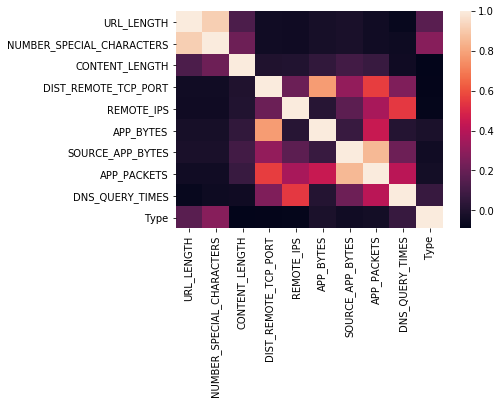

In [13]:
# Print heatmap again
sns.heatmap(websites4.corr())

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [14]:
# Your code here
websites4.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
# Your code here
#Almost 50 percent missing values.
websites5 = websites4.drop('CONTENT_LENGTH',axis = 1)
websites5.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [16]:
#dropping missing rows
websites6 = websites5.dropna(axis = 0)


In [17]:
# Your comment here

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [18]:
# Examine missing values in each column
websites6.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [19]:
websites6['WHOIS_COUNTRY'].replace({'Cyprus':'CY','us':'US','se':'SE','United Kingdom':'GB',"[u'GB'; u'UK']":'GB'},inplace=True)


websites6['WHOIS_COUNTRY'].unique()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

In [20]:
websites6['WHOIS_COUNTRY'].replace({'ru':'RU'})
websites6['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

In [21]:
# Your code here
websites6['WHOIS_COUNTRY'].value_counts()

US      1105
None     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
CN        10
IN        10
UK        10
FR         9
CZ         9
NL         6
CH         6
KR         5
ru         4
SE         4
PH         4
BS         4
AT         4
HK         3
TR         3
BE         3
SC         3
KY         3
DE         3
NO         2
UY         2
UA         2
BR         2
RU         2
CY         2
SI         2
KG         2
IL         2
LV         1
LU         1
UG         1
TH         1
AE         1
IE         1
BY         1
PK         1
IT         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

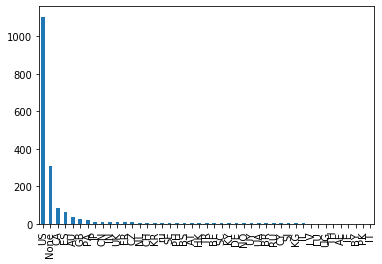

In [22]:
# Your code here
websites6['WHOIS_COUNTRY'].value_counts().plot.bar()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [23]:
websites6

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0      M0_109          16                          7  iso-8859-1   
1     B0_2314          16                          6       UTF-8   
2      B0_911          16                          6    us-ascii   
3      B0_113          17                          6  ISO-8859-1   
4      B0_403          17                          6       UTF-8   
...       ...         ...                        ...         ...   
1776    M4_48         194                         16       UTF-8   
1777    M4_41         198                         17       UTF-8   
1778   B0_162         201                         34       utf-8   
1779  B0_1152         234                         34  ISO-8859-1   
1780   B0_676         249                         40       utf-8   

                      SERVER WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE  \
0                      nginx          None           None  10/10/2015 18:21   
1              Apache/2.4.10          None           None              None   
2      Microsoft-HTTPAPI/2.0          None           None              None   
3                      nginx            US             AK    7/10/1997 4:00   
4                       None            US             TX   12/05/1996 0:00   
...                      ...           ...            ...               ...   
1776                  Apache            ES      Barcelona   17/09/2008 0:00   
1777                  Apache            ES      Barcelona   17/09/2008 0:00   
1778  Apache/2.2.16 (Debian)            US             FL   15/02/1999 0:00   
1779        cloudflare-nginx            US             CA    1/04/1998 0:00   
1780       Microsoft-IIS/8.5            US      Wisconsin   14/11/2008 0:00   

     WHOIS_UPDATED_DATE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                  None                     0           2        700   
1                  None                     7           4       1230   
2                  None                     0           0          0   
3       12/09/2013 0:45                    22           3       3812   
4       11/04/2017 0:00                     2           5       4278   
...                 ...                   ...         ...        ...   
1776     2/09/2016 0:00                     0           0          0   
1777     2/09/2016 0:00                     0           0          0   
1778    15/07/2015 0:00                     2           6       6631   
1779     9/12/2016 0:00                     0           0          0   
1780    20/11/2013 0:00                     6          11       2314   

      SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0                 1153            9              2.0     1  
1                 1265           17              0.0     0  
2                    0            0              0.0     0  
3                18784           39              8.0     0  
4               129889           61              4.0     0  
...                ...          ...              ...   ...  
1776               186            0              0.0     1  
1777               124            0              0.0     1  
1778            132181           87              4.0     0  
1779                 0            0              0.0     0  
1780              3039           25              6.0     0  

[1779 rows x 16 columns]

In [24]:
# Your code here
#top_10 = websites6['WHOIS_COUNTRY'].value_counts().to_list()[0:11]
top_10 = ['US','None','CA','ES','AU','GB','PA','JP','CN','UK','IN']
top_10
websites6['WHOIS_COUNTRY'] = websites6['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10 else 'other')


websites6['WHOIS_COUNTRY'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


US       1105
None      306
other     100
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
CN         10
UK         10
IN         10
Name: WHOIS_COUNTRY, dtype: int64

In [25]:
websites6['WHOIS_COUNTRY'].value_counts()

US       1105
None      306
other     100
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
CN         10
UK         10
IN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [26]:
# Your code here
websites7 = websites6.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],axis = 1)
websites7.head()


URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER WHOIS_COUNTRY  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0                  nginx          None                     0           2   
1          Apache/2.4.10          None                     7           4   
2  Microsoft-HTTPAPI/2.0          None                     0           0   
3                  nginx            US                    22           3   
4                   None            US                     2           5   

   APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0        700              1153            9              2.0     1  
1       1230              1265           17              0.0     0  
2          0                 0            0              0.0     0  
3       3812             18784           39              8.0     0  
4       4278            129889           61              4.0     0

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [27]:
# Your code here
websites7.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [28]:
# Your code here
websites8 = websites7.drop(['URL'],axis = 1)
websites8

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0             16                          7  iso-8859-1   
1             16                          6       UTF-8   
2             16                          6    us-ascii   
3             17                          6  ISO-8859-1   
4             17                          6       UTF-8   
...          ...                        ...         ...   
1776         194                         16       UTF-8   
1777         198                         17       UTF-8   
1778         201                         34       utf-8   
1779         234                         34  ISO-8859-1   
1780         249                         40       utf-8   

                      SERVER WHOIS_COUNTRY  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0                      nginx          None                     0           2   
1              Apache/2.4.10          None                     7           4   
2      Microsoft-HTTPAPI/2.0          None                     0           0   
3                      nginx            US                    22           3   
4                       None            US                     2           5   
...                      ...           ...                   ...         ...   
1776                  Apache            ES                     0           0   
1777                  Apache            ES                     0           0   
1778  Apache/2.2.16 (Debian)            US                     2           6   
1779        cloudflare-nginx            US                     0           0   
1780       Microsoft-IIS/8.5            US                     6          11   

      APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0           700              1153            9              2.0     1  
1          1230              1265           17              0.0     0  
2             0                 0            0              0.0     0  
3          3812             18784           39              8.0     0  
4          4278            129889           61              4.0     0  
...         ...               ...          ...              ...   ...  
1776          0               186            0              0.0     1  
1777          0               124            0              0.0     1  
1778       6631            132181           87              4.0     0  
1779          0                 0            0              0.0     0  
1780       2314              3039           25              6.0     0  

[1779 rows x 12 columns]

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [29]:
# Your code here
websites8['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [30]:
# Your code here
websites8['SERVER'].value_counts()

Apache                                                           385
nginx                                                            211
None                                                             175
Microsoft-HTTPAPI/2.0                                            113
cloudflare-nginx                                                  94
                                                                ... 
Apache/1.3.27 (Unix) PHP/4.4.1                                     1
Microsoft-IIS/8.0                                                  1
Apache/Not telling (Unix) AuthTDS/1.1                              1
Boston.com Frontend                                                1
Apache/2.2.14 (Unix) mod_ssl/2.2.14 OpenSSL/0.9.8e-fips-rhel5      1
Name: SERVER, Length: 239, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [31]:
# Your comment here
''' most of them have some form of Apache, nginx, none, or microsoft. '''

' most of them have some form of Apache, nginx, none, or microsoft. '

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [32]:
# Your code here
websites8['SERVER'][websites8['SERVER'].str.lower().str.contains('microsoft')]='microsoft'
websites8['SERVER'][websites8['SERVER'].str.lower().str.contains('apache')]='apache'
websites8['SERVER'][websites8['SERVER'].str.lower().str.contains('nginx')]='nginx'
websites8['SERVER'][~websites8['SERVER'].str.lower().isin(['microsoft','apache','nginx'])]='Other'
websites8['SERVER']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

0           nginx
1          apache
2       microsoft
3           nginx
4           Other
          ...    
1776       apache
1777       apache
1778       apache
1779        nginx
1780    microsoft
Name: SERVER, Length: 1779, dtype: object

In [33]:
# Count `SERVER` value counts here
websites8['SERVER'].value_counts()

apache       642
Other        503
nginx        436
microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [34]:
# Your code here
websites8.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [35]:
website_dummy = pd.get_dummies(data=websites8, columns=['CHARSET', 'SERVER','WHOIS_COUNTRY'], drop_first=True)


In [36]:
websites8.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET     SERVER WHOIS_COUNTRY  \
0          16                          7  iso-8859-1      nginx          None   
1          16                          6       UTF-8     apache          None   
2          16                          6    us-ascii  microsoft          None   
3          17                          6  ISO-8859-1      nginx            US   
4          17                          6       UTF-8      Other            US   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  \
0                     0           2        700              1153            9   
1                     7           4       1230              1265           17   
2                     0           0          0                 0            0   
3                    22           3       3812             18784           39   
4                     2           5       4278            129889           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

In [37]:
website_dummy

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0             16                          7                     0           2   
1             16                          6                     7           4   
2             16                          6                     0           0   
3             17                          6                    22           3   
4             17                          6                     2           5   
...          ...                        ...                   ...         ...   
1776         194                         16                     0           0   
1777         198                         17                     0           0   
1778         201                         34                     2           6   
1779         234                         34                     0           0   
1780         249                         40                     6          11   

      APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  \
0           700              1153            9              2.0     1   
1          1230              1265           17              0.0     0   
2             0                 0            0              0.0     0   
3          3812             18784           39              8.0     0   
4          4278            129889           61              4.0     0   
...         ...               ...          ...              ...   ...   
1776          0               186            0              0.0     1   
1777          0               124            0              0.0     1   
1778       6631            132181           87              4.0     0   
1779          0                 0            0              0.0     0   
1780       2314              3039           25              6.0     0   

      CHARSET_ISO-8859-1  ...  WHOIS_COUNTRY_CN  WHOIS_COUNTRY_ES  \
0                      0  ...                 0                 0   
1                      0  ...                 0                 0   
2                      0  ...                 0                 0   
3                      1  ...                 0                 0   
4                      0  ...                 0                 0   
...                  ...  ...               ...               ...   
1776                   0  ...                 0                 1   
1777                   0  ...                 0                 1   
1778                   0  ...                 0                 0   
1779                   1  ...                 0                 0   
1780                   0  ...                 0                 0   

      WHOIS_COUNTRY_GB  WHOIS_COUNTRY_IN  WHOIS_COUNTRY_JP  \
0                    0                 0                 0   
1                    0                 0                 0   
2                    0                 0                 0   
3                    0                 0                 0   
4                    0                 0                 0   
...                ...               ...               ...   
1776                 0                 0                 0   
1777                 0                 0                 0   
1778                 0                 0                 0   
1779                 0                 0                 0   
1780                 0                 0                 0   

      WHOIS_COUNTRY_None  WHOIS_COUNTRY_PA  WHOIS_COUNTRY_UK  \
0                      1                 0                 0   
1                      1                 0                 0   
2                      1                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
1776                   0                 0                 0   
1777                   0                 0                 0   
1778  

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [38]:
# Your code here
website_dummy.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0          16                          7                     0           2   
1          16                          6                     7           4   
2          16                          6                     0           0   
3          17                          6                    22           3   
4          17                          6                     2           5   

   APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  \
0        700              1153            9              2.0     1   
1       1230              1265           17              0.0     0   
2          0                 0            0              0.0     0   
3       3812             18784           39              8.0     0   
4       4278            129889           61              4.0     0   

   CHARSET_ISO-8859-1  ...  WHOIS_COUNTRY_CN  WHOIS_COUNTRY_ES  \
0                   0  ...                 0                 0   
1                   0  ...                 0                 0   
2                   0  ...                 0                 0   
3                   1  ...                 0                 0   
4                   0  ...                 0                 0   

   WHOIS_COUNTRY_GB  WHOIS_COUNTRY_IN  WHOIS_COUNTRY_JP  WHOIS_COUNTRY_None  \
0                 0                 0                 0                   1   
1                 0                 0                 0                   1   
2                 0                 0                 0                   1   
3                 0                 0                 0                   0   
4                 0                 0                 0                   0   

   WHOIS_COUNTRY_PA  WHOIS_COUNTRY_UK  WHOIS_COUNTRY_US  WHOIS_COUNTRY_other  
0                 0                 0                 0                    0  
1                 0                 0                 0                    0  
2                 0                 0                 0                    0  
3                 0                 0                 1                    0  
4                 0                 0                 1                    0  

[5 rows x 31 columns]

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [39]:
from sklearn.model_selection import train_test_split


website_dummy_y =website_dummy[website_dummy.columns.difference(['Type'])]
website_dummy_x = website_dummy['Type']




# Your code here:
X_train,X_test, y_train, y_test = train_test_split(website_dummy_y,website_dummy_x,test_size=.20)




#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [40]:
# Your code here:

from sklearn.linear_model import LogisticRegression

web_model = LogisticRegression().fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [41]:
# Your code here:



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [42]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [43]:
y_pred = web_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[311,   8],
       [ 25,  12]])

In [44]:
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.9073033707865169

What are your thoughts on the performance of the model? Write your conclusions below.

In [54]:
# Your conclusions here:
''' 90% is pretty good accuracy'''


' 90% is pretty good accuracy'

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [46]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [47]:
# Your code here:
# making predictions on the testing set 
y_pred = knn.predict(X_test) 
confusion_matrix(y_test,y_pred)    
  


array([[302,  17],
       [  8,  29]])

In [48]:
# comparing actual response values (y_test) with predicted response values (y_pred) 

accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)


0.9297752808988764

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [49]:
# Your code here:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
# making predictions on the testing set 
y_pred = knn.predict(X_test) 
confusion_matrix(y_test,y_pred)    
  

array([[307,  12],
       [ 10,  27]])

In [51]:
# comparing actual response values (y_test) with predicted response values (y_pred) 

accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)


0.9382022471910112

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [52]:
# Your conclusions here:
'''I did not see an improvement.  They are almost the same.
There was an improvement if compared to the Logistic Regression Model'''


'I did not see an improvement.  They are almost the same.\nThere was an improvement if compared to the Logistic Regression Model'

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [53]:
# Your code here